<a href="https://colab.research.google.com/github/nkrj01/Tweets-analysis-with-Open-AI/blob/main/Tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this exercise, we compare the performance of OpenAI's vector embedding (Ada embedding) with simple TF-IDF encoding. I imported pre-computed embeddings from a CSV file that was generated in a separate notebook. I used Kaggle's Twitter dataset for classifying disaster tweets. After applying the embeddings, I trained a neural network and evaluated its performance using binary accuracy and a confusion matrix. Ada embedding outperformed TF-IDF encoding by a slight margin."


## **Import Module**

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **Helper Functions**

In [ ]:
def make_binary(x):
  binary_array = np.where(x > 0.5, 1, 0)
  return binary_array

## **Importing Data (Ada Embedding)**

In [ ]:
data =  pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/OpenAI/embedded2.csv')
data['ada_embedding'] = data["ada_embedding"].apply(eval).to_list()
X = data["ada_embedding"].to_list()
X = np.array(X)
y = data["target"].astype("float64") # float required for tf

## **Importing Data (Tfidf encoding)**

In [ ]:
data =  pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/OpenAI/train_tfidf_encoded.csv')
data['tfidf'] = data["tfidf"].apply(eval).to_list()
X = data["tfidf"].to_list()
X = np.array(X)
y = data["target"].astype("float64") # float required for tf

## **Visualizing the Data**

In [ ]:
# dimensionality reduction for visualization
pca = PCA(n_components=3)
pca.fit(X)
pca_x = pca.transform(X)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors for data points based on the binary vector
colors = ['b' if c == 0 else 'y' for c in y]

# Scatter plot with colors
ax.scatter(pca_x[:, 0], pca_x[:, 1], pca_x[:, 2], c=colors)

## **Creating training and CV Data**

In [ ]:
X_train, X_CV, y_train, y_CV = train_test_split(X, y, test_size=0.1, random_state=2)

## **Neural Network**

In [ ]:
n = X_train.shape[1]
inputs = tf.keras.Input(shape=(n,))
l1 = tf.keras.layers.Dense(32, activation = tf.nn.relu)(inputs)
l2 = tf.keras.layers.Dense(16, activation = tf.nn.relu)(l1)
l3 = tf.keras.layers.Dense(4, activation = tf.nn.relu)(l2)
output = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)(l3)

model_nn = tf.keras.Model(inputs, output)

model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.F1Score()])

model_nn.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 10,
    validation_data=(X_CV, y_CV)
)

## **Model Performance**

In [ ]:
y_pred = model_nn.predict(X_CV)
y_pred = make_binary(y_pred)
# accuracy
accuracy = accuracy_score(y_CV, y_pred)
print(accuracy)
# confusion matrix
cm = confusion_matrix(y_CV, y_pred)
columns = ["Predicted Negative", "Predicted Positive"]
index = ["Actual Negative", "Actual Positive"]
df_cm = pd.DataFrame(cm, index=index, columns=columns)
df_cm.head()

# **Results**
### **Ada Embedding**

#### Data Cluster:



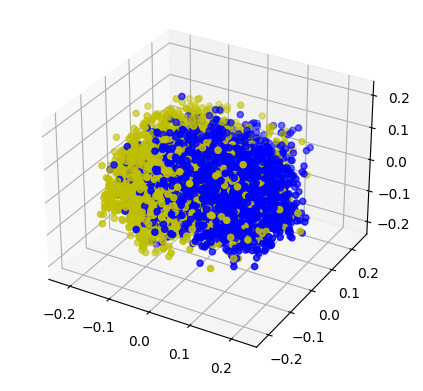

Accuracy = ~0.84

Confusion Matrix:


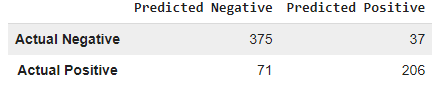


### **Tfidf Ecoding**


#### Data Cluster:

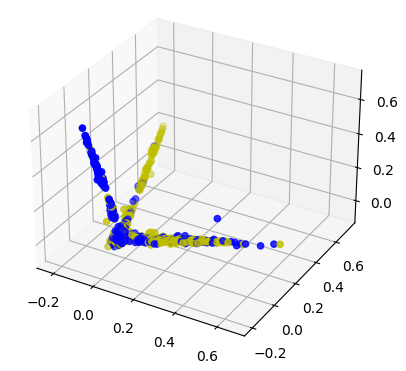

Accuracy = ~0.79

Confusion Matrix:


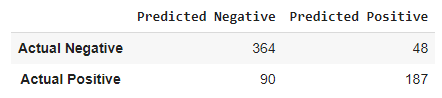


